<a href="https://colab.research.google.com/github/DaviCampos09/detec-faces/blob/main/detec_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required libraries

In [25]:
!pip install mtcnn deepface opencv-python numpy matplotlib

# Import necessary libraries

In [45]:
import cv2
import numpy as np
from mtcnn import MTCNN  # For face detection
from deepface import DeepFace  # For face recognition
from matplotlib import pyplot as plt


# Initialize MTCNN for face detection

In [27]:
detector = MTCNN()

# Function to detect faces using MTCNN

In [28]:
def detect_faces(image):
    results = detector.detect_faces(image)
    faces = []
    for result in results:
        x, y, width, height = result['box']
        face = image[y:y+height, x:x+width]
        faces.append((face, (x, y, width, height)))
    return faces

# Function to get face embeddings using DeepFace

In [39]:
def get_face_embedding(face):
    embedding = DeepFace.represent(face, model_name='Facenet',  enforce_detection=False)
    return embedding

# Function to recognize faces

In [30]:
def recognize_faces(image):
    faces = detect_faces(image)
    recognized_faces = []
    for face, (x, y, width, height) in faces:
        embedding = get_face_embedding(face)
        recognized_faces.append((embedding, (x, y, width, height)))
    return recognized_faces

# Function to draw bounding boxes and labels on the image

In [46]:
def draw_boxes(image, recognized_faces):
    for embedding, (x, y, width, height) in recognized_faces:
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
    return image

# Main function to process an image

In [47]:
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    # Detect and recognize faces
    recognized_faces = recognize_faces(image)

    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(image, recognized_faces)

    # Display the result
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()

# Examples

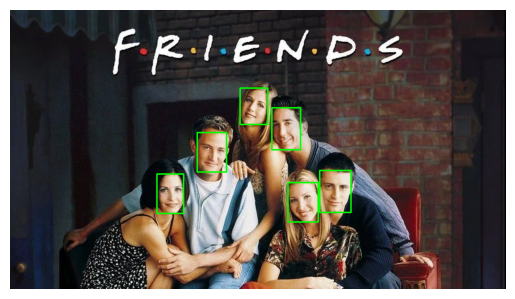

In [48]:
process_image('exemplos/friends.webp')

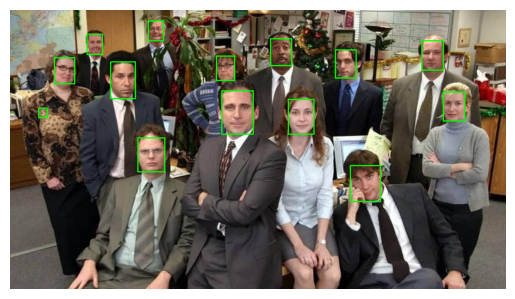

In [49]:
process_image('exemplos/the-office.webp')

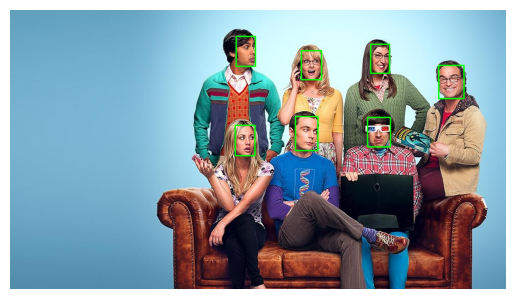

In [50]:
process_image('exemplos/tbt.jpg')

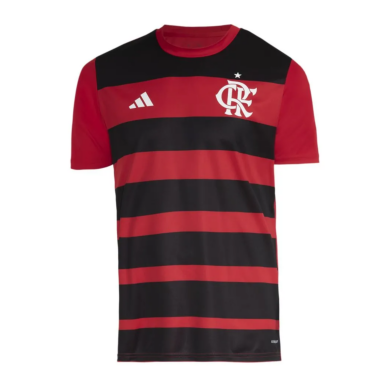

In [51]:
process_image('exemplos/camisa-fla.webp')

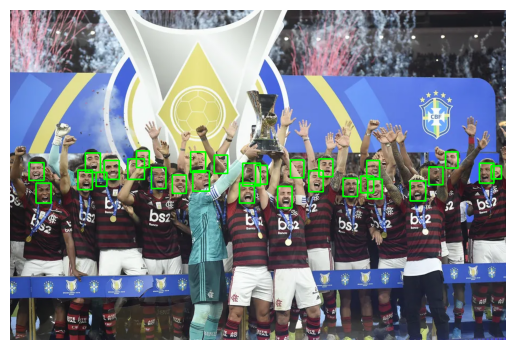

In [52]:
process_image('exemplos/elenco-fla.webp')